# Classificaion 22/09/2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1

In [3]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [4]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [5]:
df['sex'].unique()

array([0, 1], dtype=int64)

In [6]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [7]:
df['smoker'].unique()

array([1, 0], dtype=int64)

In [8]:
df['region'].unique()

array([3, 2, 1, 0], dtype=int64)

In [9]:
df['insuranceclaim'].unique()

array([1, 0], dtype=int64)

In [10]:
df.shape

(1338, 8)

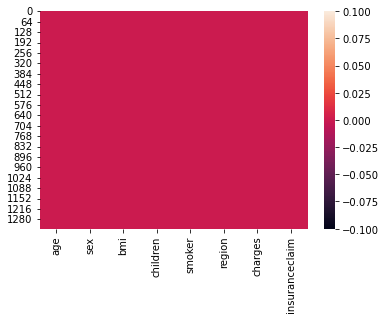

In [11]:
sns.heatmap(df.isnull())
plt.show()

In [12]:
#Check if there is any Duplicate Rows or data:-
df.duplicated().sum()

1

In [13]:
#Find The row which is dupicated:-
df[df.duplicated()]

age  sex    bmi  children  smoker  region    charges  insuranceclaim
581   19    1  30.59         0       0       1  1639.5631               1

In [14]:
#To delete the duplicate rows/row use the inbuilt function drop_duplicates:-
df.drop_duplicates(inplace=True)

In [15]:
#Now Again cross check it:-
df.duplicated().sum()

0

In [16]:
df.describe()

age          sex          bmi     children       smoker  \
count  1337.000000  1337.000000  1337.000000  1337.000000  1337.000000   
mean     39.222139     0.504862    30.663452     1.095737     0.204936   
std      14.044333     0.500163     6.100468     1.205571     0.403806   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.290000     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.700000     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  insuranceclaim  
count  1337.000000   1337.000000     1337.000000  
mean      1.516081  13279.121487        0.584892  
std       1.105208  12110.359656        0.492925  
min       0.000000   1121.873900        0.000000  
25%       1.000000   4746.344000        0.000000  
50%       2.000000   9386.161300        1.000000  
75%       2.000000  16657.717450        1.000000  
max       3.000000  63770.428010        1.000000

In [17]:
#From above we can say that the column age,bmi,children,smoker has no outlier/negleble outlier as the mean and median(50%)
#are almost the same.

In [18]:
#To show all information of given dataset:-
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1337 non-null   int64  
 1   sex             1337 non-null   int64  
 2   bmi             1337 non-null   float64
 3   children        1337 non-null   int64  
 4   smoker          1337 non-null   int64  
 5   region          1337 non-null   int64  
 6   charges         1337 non-null   float64
 7   insuranceclaim  1337 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 94.0 KB


In [19]:
#Now first we will we all the inputs, we are not dong any kind of feature selection:-
#So first select he input and output:-
X=df.drop('insuranceclaim',axis=1) #select input
Y=df['insuranceclaim'] #select output

In [20]:
#We can also select the output column in this way as here it is the last column:-
#X=df.iloc[:,:-1]
#Y=df.iloc[:,-1]

In [21]:
#here target variable is insuranceclaim which want to predict.
#if customer claim insurance : means predict yes means 1 otherwise no means 0.
#claim means 1 
#no claim means 0
#this dataset is classification dataset, solve this dataset by
#classification  algorithm
#first use Logistic regression

In [22]:
#How many category is output variable:-insuranceclaim
df['insuranceclaim'].unique()

array([1, 0], dtype=int64)

In [23]:
#How many saples of each category present in output variable:-insuranceclaim
df['insuranceclaim'].value_counts()

1    782
0    555
Name: insuranceclaim, dtype: int64

In [24]:
#Visualise :
sns.countplot(data=df,x='insuranceclaim')
f=df['insuranceclaim'].value_counts()
plt.yticks(f)
plt.show()

In [25]:
#the dataset should not be unbalanced means the data of category should not be doubled

In [26]:
#Tain test split 
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [28]:
X_train.shape,Y_train.shape   ,X_test.shape,Y_test.shape

((935, 7), (935,), (402, 7), (402,))

In [29]:
X_train.head()

age  sex     bmi  children  smoker  region      charges
520   50    0  27.360         0       0       0  25656.57526
575   58    0  27.170         0       0       1  12222.89830
770   61    1  36.100         3       0       3  27941.28758
314   27    0  31.400         0       1       3  34838.87300
426   38    0  27.265         1       0       0   6555.07035

In [30]:
#apply StandardScaler on X-train and X-test 
from sklearn.preprocessing import StandardScaler

In [31]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [32]:
X_train

array([[ 0.76935907, -1.05611771, -0.54584829, ..., -0.53158148,
        -1.38997482,  0.97973397],
       [ 1.34169182, -1.05611771, -0.57768002, ..., -0.53158148,
        -0.48304777, -0.11634023],
       [ 1.5563166 ,  0.94686415,  0.91841121, ..., -0.53158148,
         1.33080632,  1.16614713],
       ...,
       [-1.23380557,  0.94686415,  0.5280537 , ..., -0.53158148,
         0.42387927, -0.97698935],
       [ 0.05394313, -1.05611771, -1.40698031, ...,  1.88117914,
         0.42387927,  0.47286216],
       [ 1.41323342,  0.94686415,  1.76278969, ...,  1.88117914,
         0.42387927,  2.88193206]])

In [33]:
X_test

array([[ 0.3401095 , -1.05611771,  1.39588714, ...,  1.88117914,
        -0.48304777,  2.3934608 ],
       [ 1.27015023,  0.94686415,  0.15444973, ..., -0.53158148,
        -0.48304777, -0.18729799],
       [ 1.12706704, -1.05611771,  0.29769251, ..., -0.53158148,
        -1.38997482, -0.14439093],
       ...,
       [ 0.98398385,  0.94686415, -1.54435935, ..., -0.53158148,
         1.33080632, -0.29237275],
       [-1.30534716, -1.05611771, -0.70668229, ..., -0.53158148,
         1.33080632, -0.9016684 ],
       [-1.01918078,  0.94686415, -0.73683866, ..., -0.53158148,
        -1.38997482, -0.89158843]])

In [34]:
#Perform the model with the help of logistic Regression
from sklearn.linear_model import LogisticRegression

In [35]:
#create the model of logisticRegression
lr=LogisticRegression()

In [36]:
#train the model with 70% data,use inbuilt method fit() of LogisticRegression class
lr.fit(X_train,Y_train)

LogisticRegression()

In [37]:
#Test the model with 30%,use predict() inbuilt method of 
#LogisticRegression() : Y_pred=1/(1+np.exp(-x_test))
Y_pred=lr.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [38]:
#Create a dict
dict={'Actual output':Y_test,'Predicted Output':Y_pred}
df1=pd.DataFrame(dict)
df1.head(10)

Actual output  Predicted Output
629               1                 1
1087              1                 1
283               1                 1
790               1                 1
594               1                 1
579               0                 0
478               1                 1
255               1                 0
350               0                 1
262               1                 1

In [39]:
#Check the model score like r2_score in linear but here its accuracy score(0-1)
#use inbuilt method score() which define in LogisticRegression class
lr.score(X_test,Y_test)  #it is Accuracy score

0.8855721393034826

In [40]:
'''
Score is very good .
Accuracy score is always good. Most of the time, it is very good . 
means we should not depend only accuracy score  .
we also check recall ,precision ,f1-score.

'''

'\nScore is very good .\nAccuracy score is always good. Most of the time, it is very good . \nmeans we should not depend only accuracy score  .\nwe also check recall ,precision ,f1-score.\n\n'

In [41]:
'''
false positive is known as precision score
false negative is known as recall score
'''

'\nfalse positive is known as precision score\nfalse negative is known as recall score\n'

In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))

[[147  25]
 [ 21 209]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       172
           1       0.89      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



In [ ]:
'''
Recall formula = False negative / True positive + false negative

Precision Formula= False positive /  True positive + false positive

'''

In [ ]:
'''
F1 score is : it is a harmonic mean of recall and precision
--> harmonic mean is one of several kinds of average, one of the Pythagorean means.

Harmonic mean = 2AB / A+B
suppose A= Recall
        B=Precision
        
Harmonic mean = 2*Recall*Precision / Recall + Precision


'''

In [ ]:
#Here score is good(Recall) but we can more better of this score means feature selection

#Analysis for Feature Selection : Manually

#Use  Visualisation for feature selection

In [44]:
#Here in this dataset
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
'''
Here in this dataset , we have input : ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
here we have categorical type input :  sex,children,smoker,region
and we have contineous numeric value :  age ,bmi and charges
and output : caregorical type  : insuranceclaim
'''

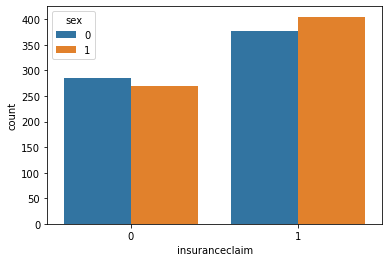

In [56]:
#First Check how many customer to claim for insurance or not also check sex column is important to predict the insurance claim
sns.countplot(data=df,x='insuranceclaim',hue='sex')
f=df['insuranceclaim'].value_counts()
#plt.yticks(f)
plt.show()
#Here Sex column is not imp

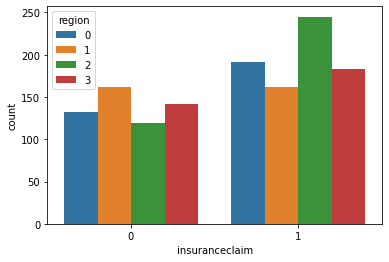

In [64]:
#here there is not lot of change but then too it is important 
sns.countplot(data=df,x='insuranceclaim',hue='region')
plt.show()


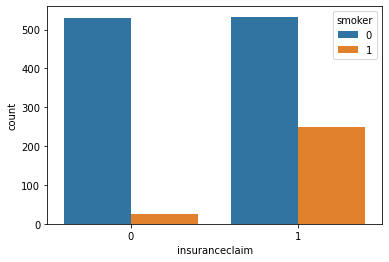

In [79]:
#Smoker column is imp for prediction 
sns.countplot(data=df,x='insuranceclaim',hue='smoker')
plt.show()


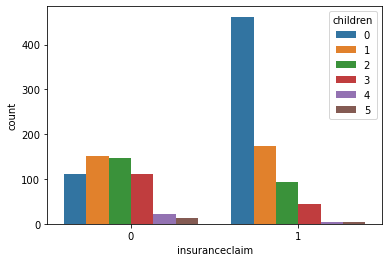

In [80]:
#clearly understand that those who has child is applying for claim so this input is important
sns.countplot(data=df,x='insuranceclaim',hue='children')
plt.show()


In [83]:
#visualise with continous numeric col use scatterplot
sns.scatterplot(data=df,x='age',y='insuranceclaim')
plt.show()


#Clearly under stand claim and not claim variation are same so this column is not imp for prediction

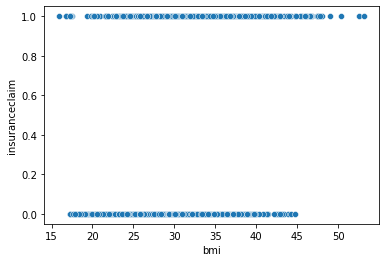

In [84]:
sns.scatterplot(data=df,x='bmi',y='insuranceclaim')
plt.show()
#Here clearly understand that the difference in the bmi col is imp as variation in claim and unclaimed is changed

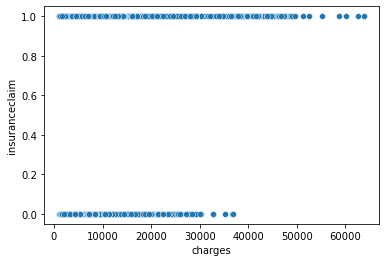

In [85]:
sns.scatterplot(data=df,x='charges',y='insuranceclaim')
plt.show()

#here variaton is seen so it is imp

In [90]:
X=df[['children','smoker','charges','bmi','region']]
Y=df['insuranceclaim']

In [ ]:
#now follow above steps from train_test_split and check report